In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import statsmodels.api as sm
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric import smoothers_lowess
from pandas import Series, DataFrame
from patsy import dmatrices
from sklearn import datasets, svm
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [41]:
df = pd.read_csv("train.csv")


In [42]:
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [43]:
df_drop = df.dropna()
df_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  183 non-null    int64  
 1   Survived     183 non-null    int64  
 2   Pclass       183 non-null    int64  
 3   Name         183 non-null    object 
 4   Sex          183 non-null    object 
 5   Age          183 non-null    float64
 6   SibSp        183 non-null    int64  
 7   Parch        183 non-null    int64  
 8   Ticket       183 non-null    object 
 9   Fare         183 non-null    float64
 10  Cabin        183 non-null    object 
 11  Embarked     183 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 18.6+ KB


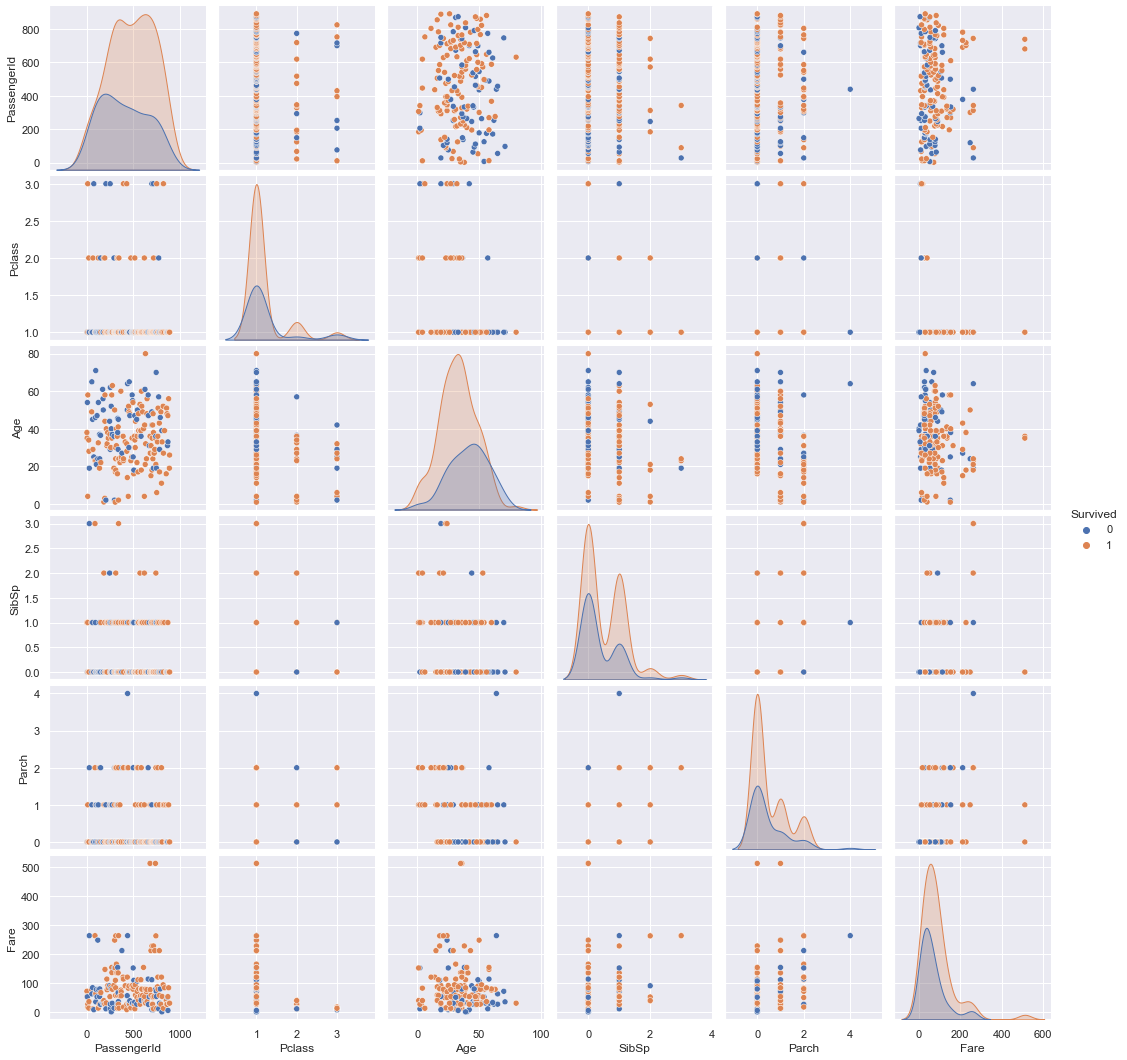

In [44]:
sns.pairplot(df_drop, hue='Survived')

In [45]:
df_drop.groupby('Survived').Age.describe()

count       mean        std   min    25%   50%   75%   max
Survived                                                            
0          60.0  41.350000  15.739484  2.00  29.75  44.5  52.5  71.0
1         123.0  32.905854  14.890113  0.92  23.00  33.0  42.0  80.0

Survived
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Age, dtype: object

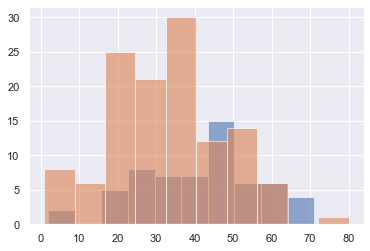

In [46]:
#Survival by Age
df_drop.groupby('Survived').Age.hist(alpha=0.6)

In [52]:
df_drop.groupby('Survived').Pclass.describe()

count      mean       std  min  25%  50%  75%  max
Survived                                                    
0          60.0  1.216667  0.584885  1.0  1.0  1.0  1.0  3.0
1         123.0  1.178862  0.479626  1.0  1.0  1.0  1.0  3.0

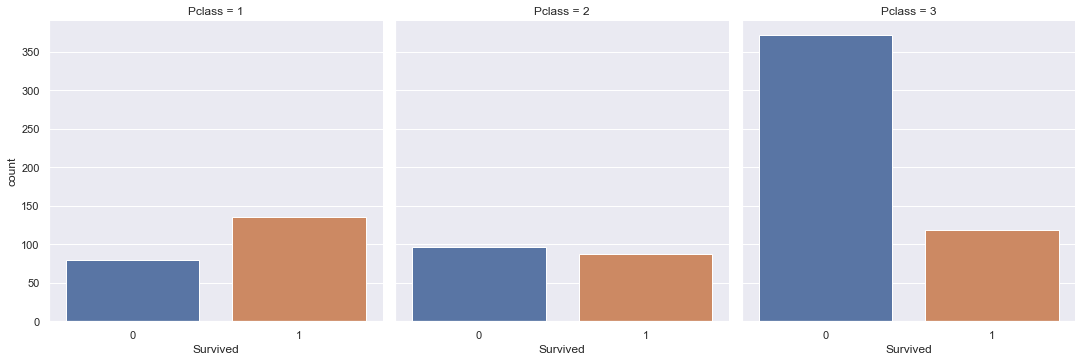

In [66]:
#Survival by Class
sns.factorplot(x='Survived', col='Pclass', kind='count', data=df)

In [67]:
df_drop.groupby('Survived').Sex.describe()

count unique     top freq
Survived                          
0           60      2    male   54
1          123      2  female   82

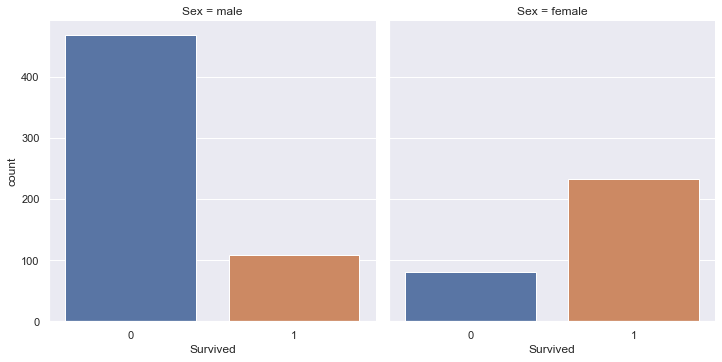

In [68]:
#Survival by Sex
sns.factorplot(x='Survived', col='Sex', kind='count', data=df)

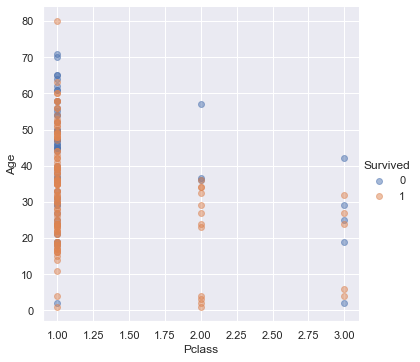

In [69]:
sns.lmplot(x='Pclass', y='Age',hue='Survived', data=df_drop, fit_reg=False, scatter_kws={'alpha':0.5})

In [70]:
fig = plt.figure(figsize=(20,5), dpi=1600) 
alpha=alpha_scatterplot = 0.2 
alpha_bar_chart = 0.5

#Survival Distribution
ax1 = plt.subplot2grid((3,3),(0,0))
             
df_drop.Survived.value_counts().plot(kind='bar', alpha=alpha_bar_chart)

ax1.set_xlim(-1, 2)

plt.title("Survival Distribution, (1 = Survived)")    

#Sex Distribution
ax1 = plt.subplot2grid((3,3),(0,1))
             
df_drop.Sex.value_counts().plot(kind='bar', alpha=alpha_bar_chart)

ax1.set_xlim(-1, 2)

plt.title("Sex Distribution")    

#Class Distribution
ax3 = plt.subplot2grid((3,3),(0,2))
df_drop.Pclass.value_counts().plot(kind="barh", alpha=alpha_bar_chart)
ax3.set_ylim(-1, len(df_drop.Pclass.value_counts()))
plt.title("Class Distribution")

#Age Distribution by Class
plt.subplot2grid((3,3),(1,0), colspan=2)

df_drop.Age[df_drop.Pclass == 1].plot(kind='kde')    
df_drop.Age[df_drop.Pclass == 2].plot(kind='kde')
df_drop.Age[df_drop.Pclass == 3].plot(kind='kde')

plt.xlabel("Age")    
plt.title("Age Distribution by Class")

plt.legend(('1st Class', '2nd Class','3rd Class'),loc='best') 

In [71]:
#Female-Survival by Class
fig = plt.figure(figsize=(20,5), dpi=1600)
alpha_level = 0.65

ax1=fig.add_subplot(141)
female_1stclass = df_drop.Survived[df_drop.Sex == 'female'][df_drop.Pclass == 1].value_counts()
female_1stclass.plot(kind='bar', label='female, 1stclass', color='blue', alpha=alpha_level)
ax1.set_xticklabels(["Survived", "Died"], rotation=0)
ax1.set_xlim(-1, len(female_1stclass))
plt.title("Female-Survival by Class"); plt.legend(loc='best')

ax2=fig.add_subplot(142, sharey=ax1)
female_2ndclass = df_drop.Survived[df_drop.Sex == 'female'][df_drop.Pclass == 2].value_counts()
female_2ndclass.plot(kind='bar', label='female, 2ndclass', color='red', alpha=alpha_level)
ax2.set_xticklabels(["Survived","Died"], rotation=0)
ax2.set_xlim(-1, len(female_2ndclass))
plt.legend(loc='best')


ax3=fig.add_subplot(143, sharey=ax1)
female_3rdclass = df_drop.Survived[df_drop.Sex == 'female'][df_drop.Pclass == 3].value_counts()
female_3rdclass.plot(kind='bar', label='female, 3rdclass', color='yellow', alpha=alpha_level)
ax3.set_xticklabels(["Survived","Died"], rotation=0)
ax3.set_xlim(-1, len(female_3rdclass))
plt.legend(loc='best')


In [72]:
#Male-Survival by Class
fig = plt.figure(figsize=(20,5), dpi=1600)
alpha_level = 0.65

ax1=fig.add_subplot(141)
male_1stclass = df_drop.Survived[df_drop.Sex == 'male'][df_drop.Pclass == 1].value_counts()
male_1stclass.plot(kind='bar', label='male, 1stclass',color='blue', alpha=alpha_level)
ax1.set_xticklabels(["Survived","Died"], rotation=0)
ax1.set_xlim(-1, len(male_1stclass))
plt.title("Male-Survival by Class"); plt.legend(loc='best')

ax2=fig.add_subplot(142, sharey=ax1)
male_2ndclass = df_drop.Survived[df_drop.Sex == 'male'][df_drop.Pclass == 2].value_counts()
male_2ndclass.plot(kind='bar', label='male, 2ndclass', color='red', alpha=alpha_level)
ax2.set_xticklabels(["Survived","Died"], rotation=0)
ax2.set_xlim(-1, len(male_2ndclass))
plt.legend(loc='best')

ax3=fig.add_subplot(143, sharey=ax1)
male_3rdclass = df_drop.Survived[df_drop.Sex == 'male'][df_drop.Pclass == 3].value_counts()
male_3rdclass.plot(kind='bar', label='male, 3rdclass', color='yellow', alpha=alpha_level)
ax3.set_xticklabels(["Survived","Died"], rotation=0)
ax3.set_xlim(-1, len(male_3rdclass))
plt.legend(loc='best')